PEKENALAN DATASET
======================

# Dataset Overview
------------------------
Tehran House Prices Dataset
----------------------------
This dataset contains information on residential property prices in Tehran, scraped from the Divar site. It includes features such as Price (USD), Price (IRR), Area, Room, Parking, Warehouse, Elevator availability, Address, and more. The data is intended for analyzing housing market trends and price predictions in Tehran's real estate sector.

1. Sumber Dataset yang pilih: [**Kaggle**] (https://www.kaggle.com/datasets/valakhorasani/tehran-house-prices-dataset)

2. Dataset:
   - **label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Dataset memiliki 3.479 baris data.
   - **Tipe Data**: Mengandung 8 kolom dengan data **kategorikal** dan **numerikal**.
     - *Kategorikal* : Parking, Warehouse,Elevator, Address
     - *Numerikal* : Price (USD), Price (IRR), Area, Room
    
3. Key Feature:<br>
  Dataset ini berisi informasi transaksi penjualan kendaraan dengan variabel-variable sebagai berikut:
- **Price (IRR)** → The price of the property in Iranian Rials.
- **Price (USD)** → The price of the property in US Dollars.
- **Room** → The number of rooms in the property.
- **Area** → The total area of the property in square meters
- **Warehouse** → Availability of a warehouse (Yes/No).
- **Elevator** → Availability of an elevator (Yes/No).
- **Parking** → Availability of parking (Yes/No).
- **Address** → The location of the property.





IMPORT LIBRARY
===============
Dalam tahahapan ini, saya akan mengimpor sejumlah packge libary dalam bahasa python yang akan di butuhkan untuk analisis data dalam pembuatan machine machine learning. Library tersebut menyediakan berbagai fungsi, termasuk analisis data, visualisasi, preprocessing, serta penerapan algoritma clustering.

In [ ]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from itertools import combinations

MEMBUAT DATASET
================
Pada tahapan ini membuat dataset dalam notebook dalam csv dengan menggunakan pustaka pandas untuk membacanya link url nya.


In [ ]:
url = "https://raw.githubusercontent.com/Sinestesiaaa/BMLUP_TehranHouse/refs/heads/main/Dataset/TehranHouse.csv"
df = pd.read_csv(url)
df.head(7)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00


EXPLORATORY DATA ANALYSIS (EDA)
================================
Menganalisis jumlah baris, kolom serta jenis data dalam dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


Bedasarkan pengamatan dalam struktur data diatas, Terdapat beberapa point yang dapat disimpulkan di atas:
----------------------------------------------------

Dataset memiliki 3479 data entri dan 8 kolom. Tipe data diatas terdiri dari:

* 3 kolom bertipe bool
* 2 kolom bertipe objeck
* 2 kolom bertipe float64
* 1 kolom bertipe int64





**Mengidentifikasi dan menganalisis data yang hilang (Missing Value)**

In [ ]:
print("Jumlah data yang hilang dalam setiap kolom:")
print(df.isnull().sum())

Jumlah data yang hilang dalam setiap kolom:
Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64


In [ ]:
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

#missing_df = pd.DataFrame({'Missing Values': missing_values, 'Persentasi':  missing_percentage})
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Persentasi': missing_values_percentage}) # Use missing_values_percentage here
missing_df = missing_df[missing_df['Missing Values'] > 0 ].sort_values(by='Persentasi', ascending=False)

print(missing_df)

         Missing Values  Persentasi
Address              23     0.66111


**Penanganan Pada Missing Value Tersebut**

1. Menghapus data hilang

* Pada data address jumlah data yang hilang akan sedikit akan di hapus. Karena jumlah missing values terlalu kecil di banding dataset (Kurang lebih dari 5%)

In [ ]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


**Data Numerik**


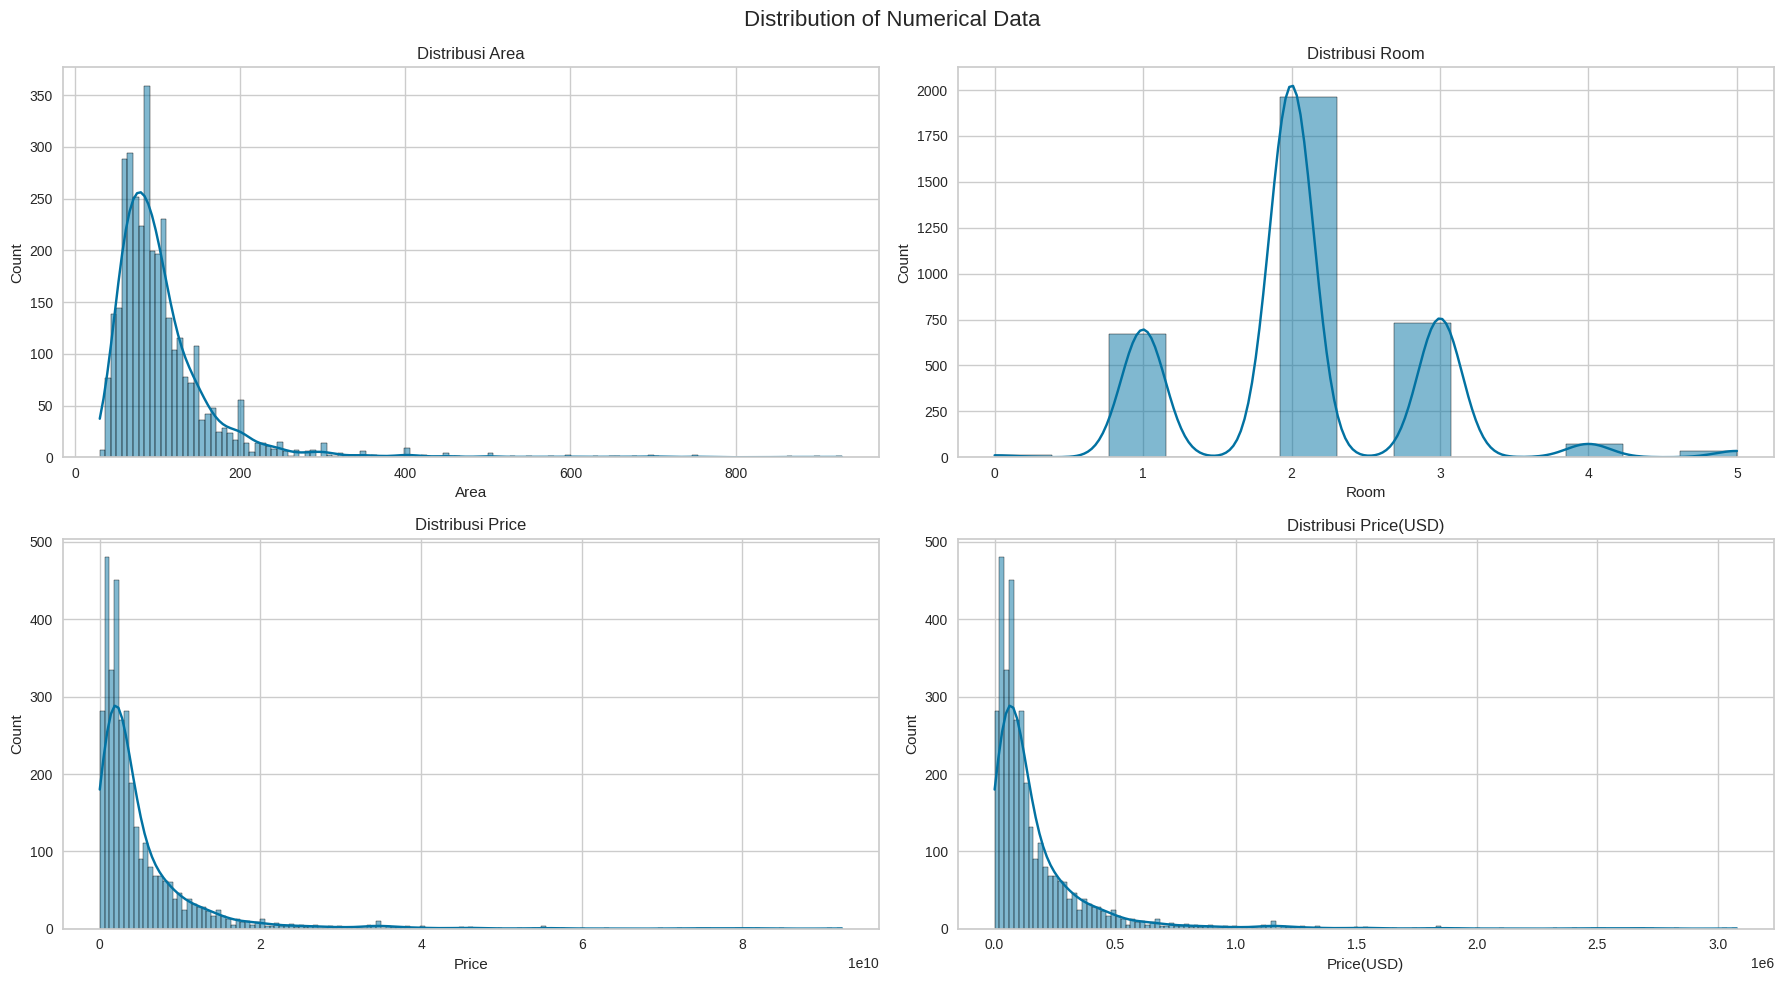

In [ ]:
# Merubah kolom Area menjadi int
df["Area"] = pd.to_numeric(df["Area"], errors="coerce").astype("Int64")

numeric_columns = df.select_dtypes(include=['number'])
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

for i, col in enumerate(numeric_columns):
    row, col_index = divmod(i, 2)
    sns.histplot(df[col], ax=axes[row, col_index], kde=True)
    axes[row, col_index].set_title(f"Distribusi {col}")

plt.suptitle("Distribution of Numerical Data", fontsize=16)
plt.tight_layout()
plt.show()

Analisis Diagram
===============

1. Distribusi Area (Luas Apartemen)

* Mayoritas apartemen memiliki luas di bawah 200 m², tetapi ada beberapa outlier yang lebih dari 800 m².
* Distribusi sangat skewed ke kanan (positively skewed).

2. Jumlah Kamar (Distribusi Room)
* Data bersifat multi modal, dengan pucak utama 1, 2, dan 3 Harga Mata Uang lokal (Price)
* Manyoritas apartemen memiliki harga murah, tetapi ada outlier dengan harga miliaran.
4. Distribusi Price (USD$)
* Hampir identik dengan distribusi harga dalam mata uang lokal, karena perbedaan hanya pada konversi.
- Sangat skewed, menunjukkan adanya beberapa apartemen sangat mahal dibandingkan mayoritas yang murah.



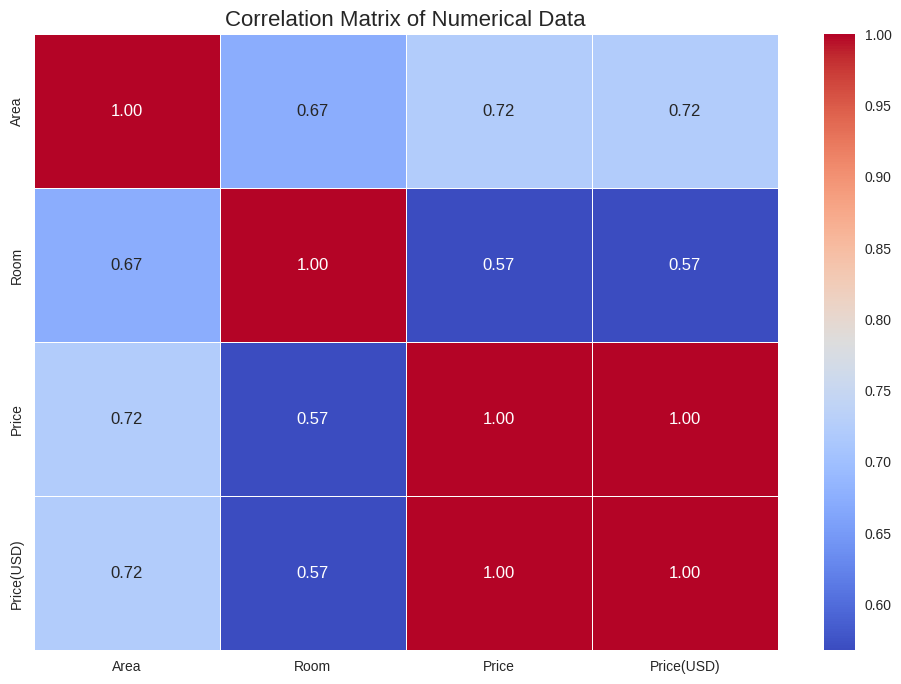

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of Numerical Data', fontsize=16)
plt.show()

Heatmap ini menunjukkan korelasi antara variabel numerik dalam dataset. Berikut beberapa insight yang bisa diperoleh:
1. Korelasi Area & Harga (Price & Price USD) → 0.72
- Interpretasi: Semakin besar luas apartemen (Area), semakin tinggi harga apartemen.
2. Korelasi Room & Area → 0.67
- Interpretasi: Apartemen dengan lebih banyak kamar cenderung memiliki luas yang lebih besar. Lebih banyak ruangan memerlukan lebih banyak ruang fisik.
3. Korelasi Room & Price → 0.57
- Interpretasi: Ada hubungan cukup kuat antara jumlah kamar dan harga, berarti luas lebih memengaruhi harga dibanding jumlah kamar.
4. Korelasi antara Price & Price(USD) → 1.00
- Interpretasi: Ini menunjukkan bahwa harga dalam mata uang lokal dan USD memiliki hubungan linear sempurna.

- Kesimpulan
  - Area adalah faktor utama dalam menentukan harga apartemen.
  - Jumlah kamar juga berpengaruh, tapi lebih kecil dibanding luas.
  - Harga dalam mata uang lokal dan USD sangat berkorelasi, jadi bisa mempertimbangkan menggunakan salah satunya.


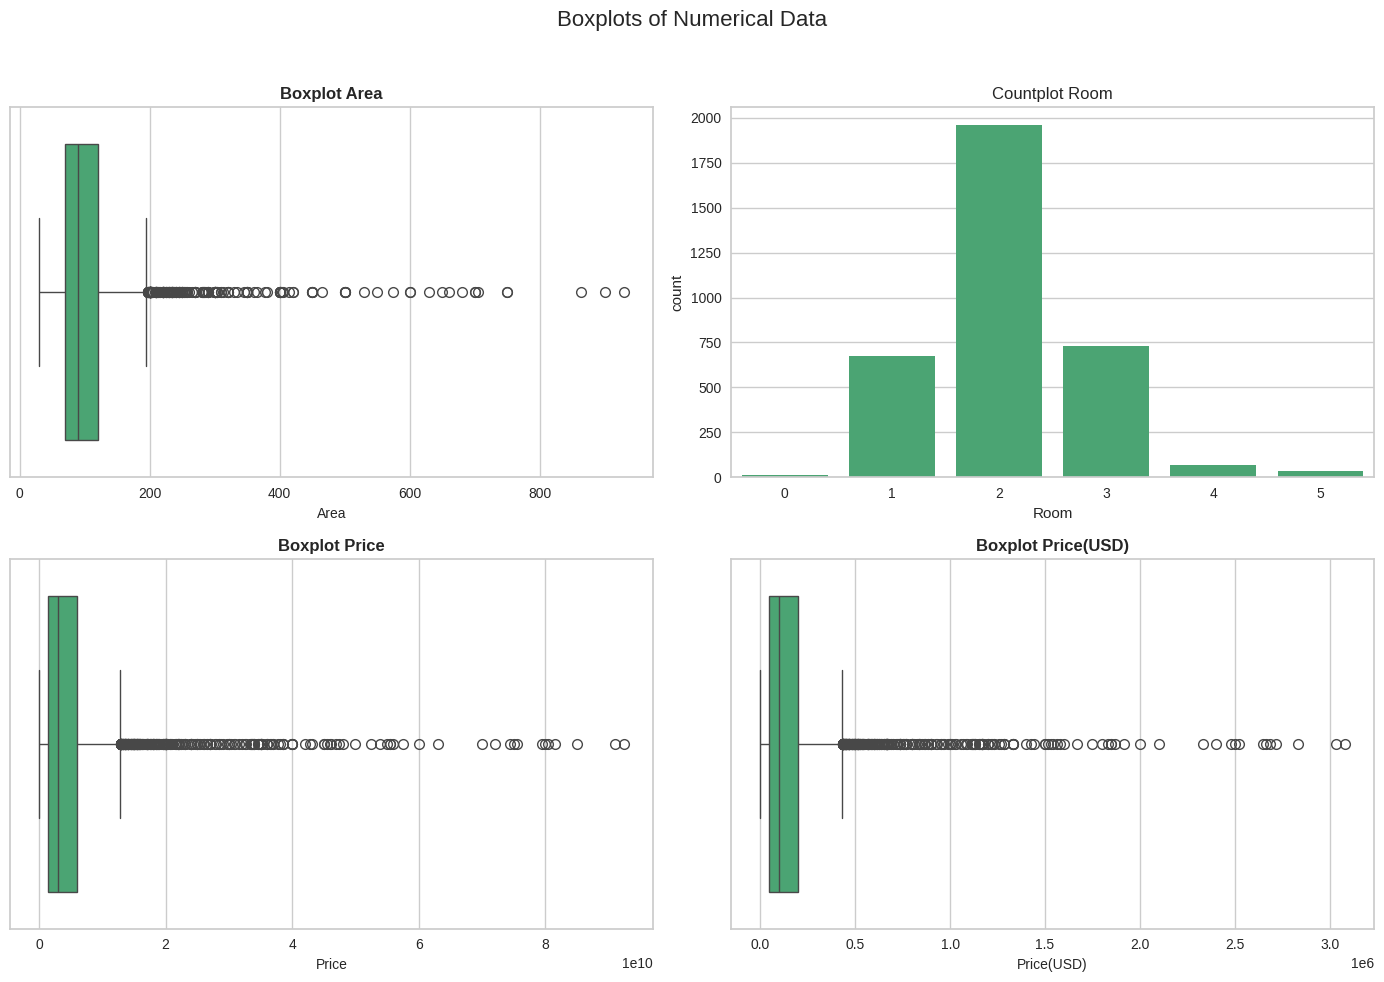

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Boxplots of Numerical Data", fontsize=16)

# Boxplot untuk Area
sns.boxplot(x=df["Area"], color="mediumseagreen", ax=axes[0, 0])
axes[0, 0].set_title("Boxplot Area", fontsize=12, fontweight="bold")
axes[0, 0].set_xlabel("Area", fontsize=10)

# Barplot untuk Room
sns.countplot(x=df["Room"], color="mediumseagreen", ax=axes[0, 1])
axes[0, 1].set_title("Countplot Room")
axes[0, 1].set_xlabel("Room")

# Boxplot untuk Price
sns.boxplot(x=df["Price"], color="mediumseagreen", ax=axes[1, 0])
axes[1, 0].set_title("Boxplot Price", fontsize=12, fontweight="bold")
axes[1, 0].set_xlabel("Price", fontsize=10)

# Boxplot untuk Price(USD)
sns.boxplot(x=df["Price(USD)"], color="mediumseagreen", ax=axes[1, 1])
axes[1, 1].set_title("Boxplot Price(USD)", fontsize=12, fontweight="bold")
axes[1, 1].set_xlabel("Price(USD)", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

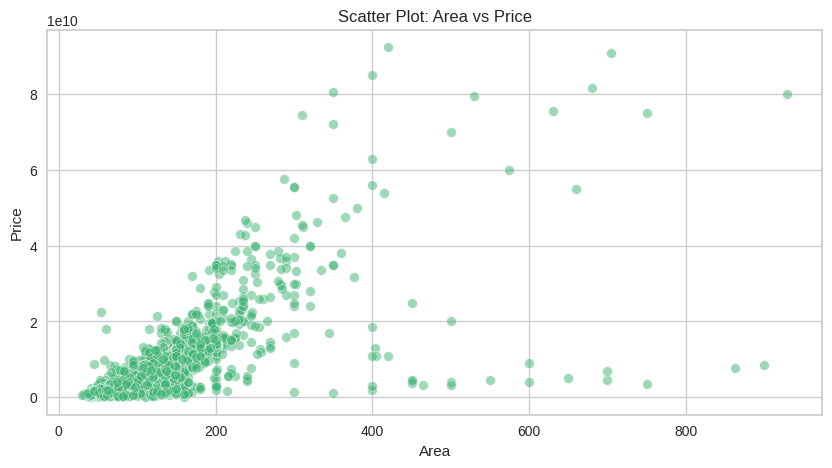

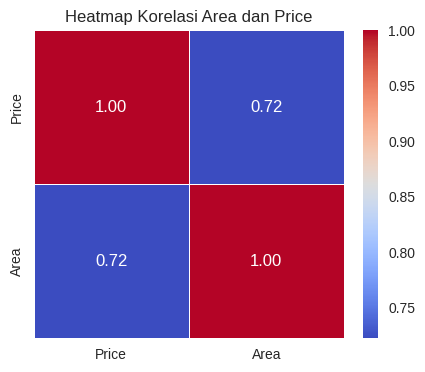

Korelasi antara Area dan Price: 0.72


In [ ]:
df_filtered = df[['Price', 'Area']].dropna()

# Hitung korelasi
correlation = df_filtered.corr()

# Scatter plot antara Price dan Area
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_filtered, x='Area', y='Price', alpha=0.5, color='mediumseagreen')
plt.title("Scatter Plot: Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Heatmap korelasi antara Price dan Area
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Area dan Price")
plt.show()

print(f"Korelasi antara Area dan Price: {correlation.loc['Area', 'Price']:.2f}")

Terlihat bahwa harga (Price) cenderung meningkat seiring dengan bertambahnya luas (Area). Hal ini menunjukkan korelasi positif, artinya properti dengan area lebih besar cenderung memiliki harga lebih tinggi.


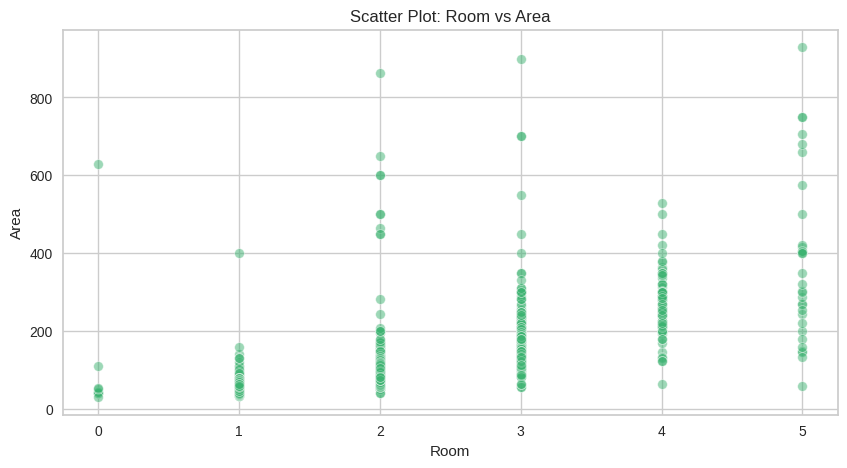

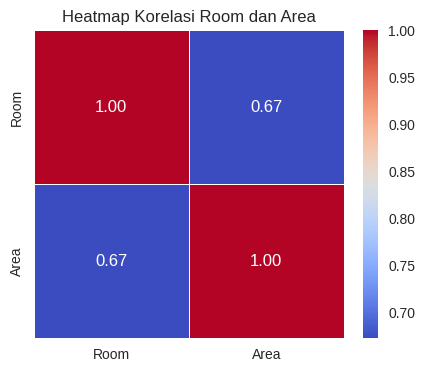

Korelasi antara Room dan Area: 0.67


In [ ]:
df_filtered = df[['Room', 'Area']].dropna()

# Hitung korelasi
correlation = df_filtered.corr()

# Scatter plot antara Room dan Area
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_filtered, x='Room', y='Area', alpha=0.5, color='mediumseagreen')
plt.title("Scatter Plot: Room vs Area")
plt.xlabel("Room")
plt.ylabel("Area")
plt.grid(True)
plt.show()

# Heatmap korelasi antara Room dan Area
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Room dan Area")
plt.show()

print(f"Korelasi antara Room dan Area: {correlation.loc['Room', 'Area']:.2f}")


> Secara umum, semakin banyak jumlah Room, semakin besar luas Area. Hal ini masuk akal karena properti dengan lebih banyak kamar biasanya membutuhkan area yang lebih besar.

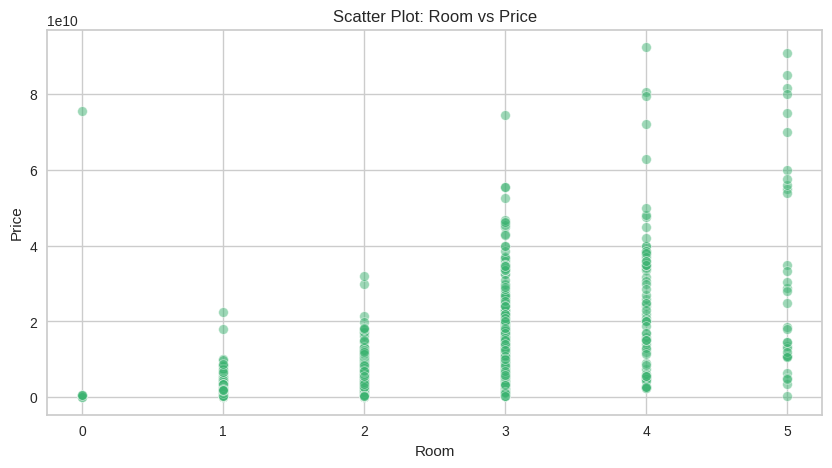

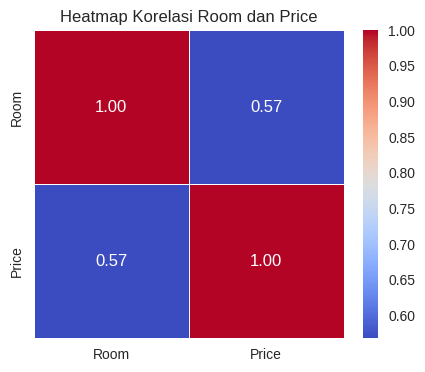

Korelasi antara Room dan Price: 0.57


In [ ]:
df_filtered = df[['Room', 'Price']].dropna()

# Hitung korelasi
correlation = df_filtered.corr()

# Scatter plot antara Room dan Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_filtered, x='Room', y='Price', alpha=0.5, color='mediumseagreen')
plt.title("Scatter Plot: Room vs Price")
plt.xlabel("Room")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Heatmap korelasi antara Room dan Price
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Room dan Price")
plt.show()

print(f"Korelasi antara Room dan Price: {correlation.loc['Room', 'Price']:.2f}")


Kondisi Korelasi positif melemah
----------------------------------
Secara umum, semakin banyak room harga juga semakin meningkat, Namun ada beberapa yang sangat luas setiap kategori room.

**Data Kategorikal**

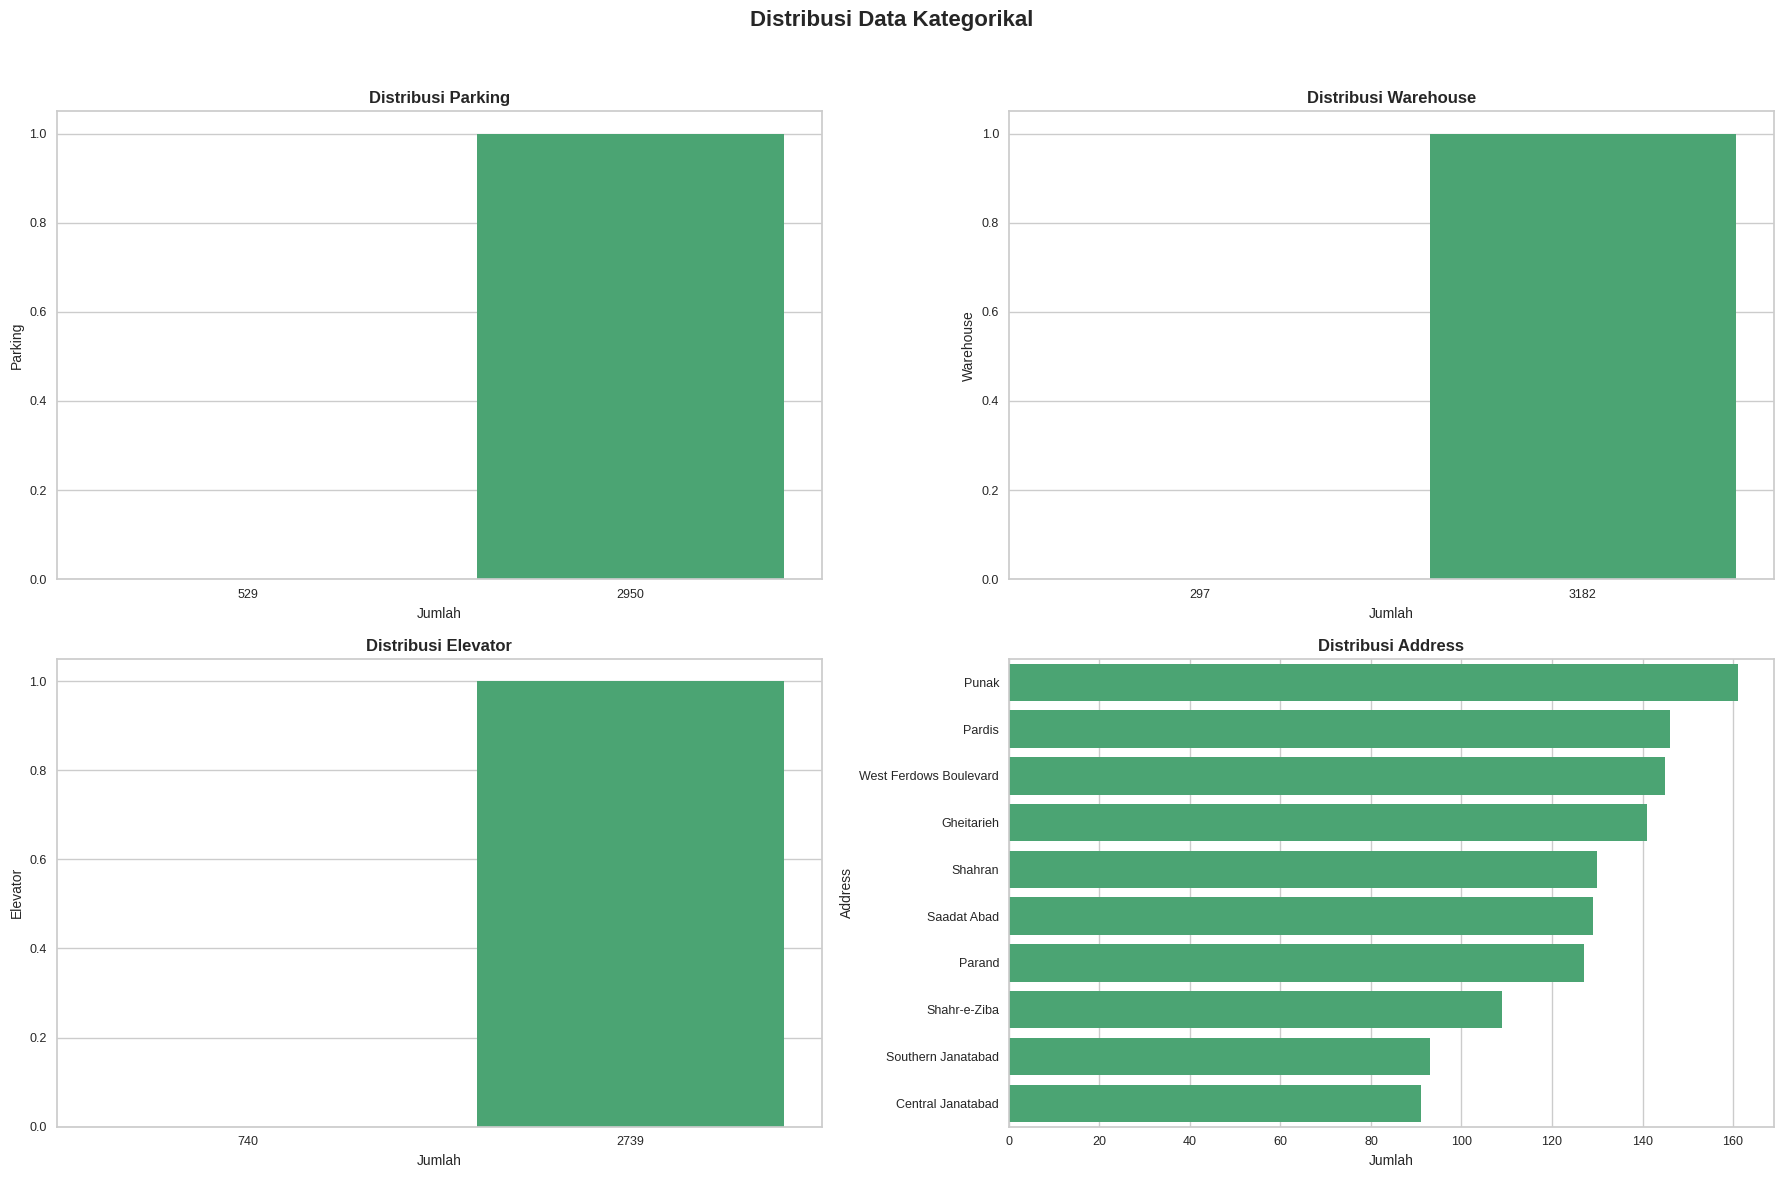

In [ ]:
categorical_columns = ["Parking", "Warehouse","Elevator", "Address"]

num_cols = 2
num_rows = -(-len(categorical_columns) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
fig.suptitle("Distribusi Data Kategorikal", fontsize=16, fontweight="bold")

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    top_values = df[col].value_counts().head(10)
    sns.barplot(x=top_values.values, y=top_values.index, color="mediumseagreen", ax=axes[i])

    axes[i].set_title(f"Distribusi {col}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel("Jumlah", fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].tick_params(axis="both", labelsize=9)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Analisis Diagram**
Dari gambar diatas terdapat 4 table
1. Distrubusi Parking
* Mayoritas properti memiliki fasilitas parking, sementara sebagian kecil tidak.
2. Distribusi Warehouse
* Sebagian besar properti tidak memiliki warehouse, hanya sebagian kecil yang memilikinya.
3. Distribusi Elevator
* Sama seperti parkir, sebagian besar properti memiliki elevator, sedangkan sebagian kecil tidak.
4. Distribusi Address (Lokasi)
* Beberapa lokasi paling umum dalam dataset adalah Punak, Pardis, dan West Ferdows Boulevard. Ini menunjukkan bahwa sebagian besar properti terletak di daerah-daerah tersebut, yang mungkin memiliki permintaan tinggi atau perkembangan properti yang pesat.

**Data Preprocesing**
====================
Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Berikut ini adalah tahapan-tahapan sebagai berikut.
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)


**1. Cara atas i Missing Values**
=================================

* Menghapus Missing Values pada data adress


In [ ]:
# Mengganti nilai NaN dengan string kosong
df.replace("", np.nan, inplace=True)

# Hapus baris yang memiliki missing values
df.dropna(inplace=True)

# Cek jumlah baris yang tersisa
print(f"Jumlah baris yang tersisa setelah menghapus missing values: {df.shape[0]}")

# Cek jumlah missing values setelah penghapusan
print("Jumlah missing values setelah penghapusan baris yang memiliki NaN di salah satu kolom:")
print(df.isnull().sum())

Jumlah baris yang tersisa setelah menghapus missing values: 3450
Jumlah missing values setelah penghapusan baris yang memiliki NaN di salah satu kolom:
Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64


**Menghapus Data Duplikat**
============================


In [ ]:
print("Jumlah duplikat", df.duplicated().sum())

Jumlah duplikat 208


In [ ]:
df_cleaned = df.drop_duplicates()
print(f"Jumlah baris setelah mengahapus duplicate: {df_cleaned.shape[0]}")

df_cleaned = df_cleaned.dropna()

Jumlah baris setelah mengahapus duplicate: 3242


**Normalisasi dan Standar Fitur**
===================================


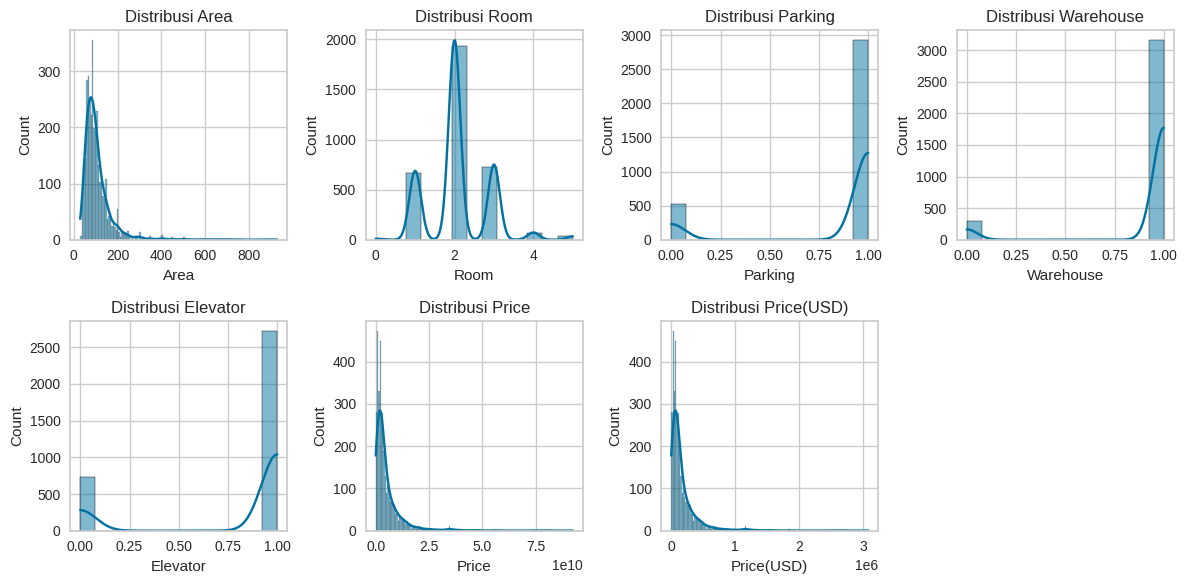

In [ ]:
numerical_columns = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price', 'Price(USD)']

# Plot distribusi data
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [ ]:
# Salin df
df_normalized = df.copy()

# Inisialisasi scaler
scaler = StandardScaler()

# Menentukan kolom yang akan di-scale
columns_to_scale = ['Area', 'Price', 'Price(USD)']

# Melakukan scaling
df_normalized[columns_to_scale] = scaler.fit_transform(df_normalized[columns_to_scale])

# Menampilkan hasil
df_normalized.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,-0.631533,1,True,True,True,Shahran,-0.433929,-0.433929
1,-0.674673,1,True,True,True,Shahran,-0.433929,-0.433929
2,-0.401453,2,True,True,True,Pardis,-0.593934,-0.593934
3,-0.171372,2,True,True,True,Shahrake Qods,-0.550548,-0.550548
4,0.231268,2,True,True,True,Shahrake Gharb,0.199937,0.199937


MinMaxScaler() digunakan untuk mengubah nilai Room ke dalam skala 0 - 1.

fit_transform() menghitung skala dan langsung menerapkannya ke Room.

In [ ]:
# Inisialisasi scaler
min_max_scaler = MinMaxScaler()

# Melakukan scaling pada kolom 'Room'
df_normalized['Room_scaled'] = min_max_scaler.fit_transform(df[['Room']])

# Menampilkan hasil
df_normalized.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Room_scaled
0,-0.631533,1,True,True,True,Shahran,-0.433929,-0.433929,0.2
1,-0.674673,1,True,True,True,Shahran,-0.433929,-0.433929,0.2
2,-0.401453,2,True,True,True,Pardis,-0.593934,-0.593934,0.4
3,-0.171372,2,True,True,True,Shahrake Qods,-0.550548,-0.550548,0.4
4,0.231268,2,True,True,True,Shahrake Gharb,0.199937,0.199937,0.4


In [ ]:
# Menghapus kolom room
df_normalized.drop(columns=['Room'], inplace=True)

df_normalized.head()

,Area,Parking,Warehouse,Elevator,Address,Price,Price(USD),Room_scaled
0,-0.631533,True,True,True,Shahran,-0.433929,-0.433929,0.2
1,-0.674673,True,True,True,Shahran,-0.433929,-0.433929,0.2
2,-0.401453,True,True,True,Pardis,-0.593934,-0.593934,0.4
3,-0.171372,True,True,True,Shahrake Qods,-0.550548,-0.550548,0.4
4,0.231268,True,True,True,Shahrake Gharb,0.199937,0.199937,0.4


**Deteksi dan Penangan Outlier**
================================

Jumlah data sebelum menghapus outlier: 3450


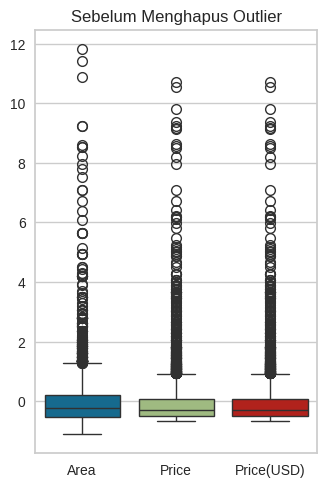

In [ ]:
# Sebelum Menghapus Outlier
plt.subplot(1, 2, 1)
sns.boxplot(data=df_normalized[['Area', 'Price', 'Price(USD)']])
plt.title("Sebelum Menghapus Outlier")

print(f"Jumlah data sebelum menghapus outlier: {df_normalized.shape[0]}")

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Membuat salinan DataFrame
df_cleaned = df_normalized.copy()

# Menghapus outlier hanya dalam df_cleaned
for col in ['Area', 'Price', 'Price(USD)']:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# Menyimpan hasil
df_after = df_cleaned[['Area', 'Price', 'Price(USD)']]

# Menampilkan jumlah data sebelum dan sesudah
print(f"Jumlah data sebelum menghapus outlier: {df.shape[0]}")
print(f"Jumlah data setelah menghapus outlier: {df_cleaned.shape[0]}")

Jumlah data sebelum menghapus outlier: 3450
Jumlah data setelah menghapus outlier: 2863


Jumlah data sebelum menghapus outlier: 2863


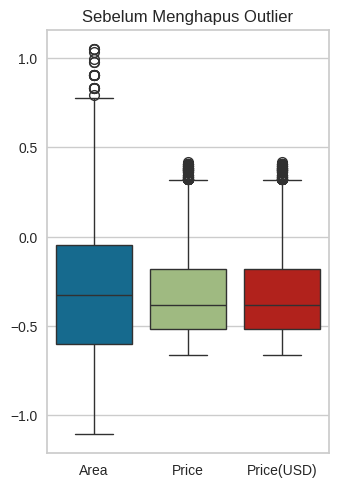

In [ ]:
# Setelah Menghapus Outlier
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned[['Area', 'Price', 'Price(USD)']])
plt.title("Sebelum Menghapus Outlier")

print(f"Jumlah data sebelum menghapus outlier: {df_after.shape[0]}")

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2863 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         2863 non-null   float64
 1   Parking      2863 non-null   bool   
 2   Warehouse    2863 non-null   bool   
 3   Elevator     2863 non-null   bool   
 4   Address      2863 non-null   object 
 5   Price        2863 non-null   float64
 6   Price(USD)   2863 non-null   float64
 7   Room_scaled  2863 non-null   float64
dtypes: bool(3), float64(4), object(1)
memory usage: 142.6+ KB


In [ ]:
df_cleaned.head()

,Area,Parking,Warehouse,Elevator,Address,Price,Price(USD),Room_scaled
0,-0.631533,True,True,True,Shahran,-0.433929,-0.433929,0.2
1,-0.674673,True,True,True,Shahran,-0.433929,-0.433929,0.2
2,-0.401453,True,True,True,Pardis,-0.593934,-0.593934,0.4
3,-0.171372,True,True,True,Shahrake Qods,-0.550548,-0.550548,0.4
4,0.231268,True,True,True,Shahrake Gharb,0.199937,0.199937,0.4


**Encoding Data Kategorikal**
=================================

Kolom kategorikal seperti address, parking werehouse, dan evelator harus di ubah menjadi angka


In [ ]:
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(df_cleaned[['Parking', 'Warehouse', 'Elevator']])

In [ ]:
df_cleaned = df_cleaned.reset_index(drop=True)
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['Parking', 'Warehouse', 'Elevator']))
encoded_df = encoded_df.reset_index(drop=True)

df_encoded = pd.concat([df_cleaned.drop(columns=['Parking', 'Warehouse', 'Elevator']), encoded_df], axis=1)


df_encoded.head()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2863 entries, 0 to 2862
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            2863 non-null   float64
 1   Address         2863 non-null   object 
 2   Price           2863 non-null   float64
 3   Price(USD)      2863 non-null   float64
 4   Room_scaled     2863 non-null   float64
 5   Parking_True    2863 non-null   float64
 6   Warehouse_True  2863 non-null   float64
 7   Elevator_True   2863 non-null   float64
dtypes: float64(7), object(1)
memory usage: 179.1+ KB


In [ ]:
df_full_final = df_encoded.copy()
df_full_final.dropna()
df_full_final.head()

,Area,Address,Price,Price(USD),Room_scaled,Parking_True,Warehouse_True,Elevator_True
0,-0.631533,Shahran,-0.433929,-0.433929,0.2,1.0,1.0,1.0
1,-0.674673,Shahran,-0.433929,-0.433929,0.2,1.0,1.0,1.0
2,-0.401453,Pardis,-0.593934,-0.593934,0.4,1.0,1.0,1.0
3,-0.171372,Shahrake Qods,-0.550548,-0.550548,0.4,1.0,1.0,1.0
4,0.231268,Shahrake Gharb,0.199937,0.199937,0.4,1.0,1.0,1.0


**Pembagunan Model Clustering**
================================

1. Membagun model clustering
-----------------------------

In [ ]:
features = df_full_final[[ 'Price', 'Room_scaled',
                          'Parking_True', 'Warehouse_True', 'Elevator_True']].copy()

features = features.dropna()

X = features.copy()
X.head()

,Price,Room_scaled,Parking_True,Warehouse_True,Elevator_True
0,-0.433929,0.2,1.0,1.0,1.0
1,-0.433929,0.2,1.0,1.0,1.0
2,-0.593934,0.4,1.0,1.0,1.0
3,-0.550548,0.4,1.0,1.0,1.0
4,0.199937,0.4,1.0,1.0,1.0


2. Evalusi Model Clustering
----------------------------

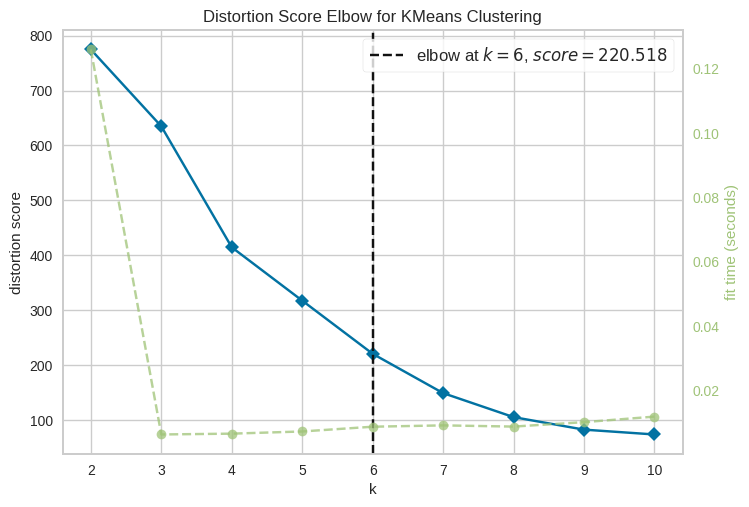

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(random_state=112)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 11))

# Fit visualizer
visualizer.fit(X)

# Menampilkan grafik elbow
visualizer.show()

In [ ]:
# Reduksi Dimensi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(2863, 2)


In [ ]:
# Ambil k optimal dari Elbow method
optimal_k = visualizer.elbow_value_
# Fit data pada model k-means dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=72, init='k-means++')
kmeans.fit(X_pca)

KMeans(n_clusters=np.int64(6), random_state=72)

In [ ]:
# Hitung Silhouette Score
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)

print(f"Silhouette  for K={optimal_k}: {silhouette_avg:.4f}")

Silhouette  for K=6: 0.8819


3. Feature Selection
---------------------

Silahkan lakukan feature selection jika optimasi model clustering.

In [ ]:
def backward_elimination(df_be, features, min_features=5, n_clusters=3, random_state=42):
    X = df_be[features]
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    best_score_be = -1
    best_features_be = features.copy()

    while len(best_features_be) > min_features:
        worst_feature = None

        for feature in best_features_be:
            temp_features = best_features_be.copy()
            temp_features.remove(feature)

            if all(f in df_be.columns for f in temp_features):
                X_subset = df_be[temp_features]
                kmeans.fit(X_subset)
                score = silhouette_score(X_subset, kmeans.labels_)

                if score > best_score_be:
                    best_score_be = score
                    worst_feature = feature

        if worst_feature:
            best_features_be.remove(worst_feature)

    return best_features_be, best_score_be

In [ ]:
def forward_selection(df_fs, features, min_features=5, n_clusters=3, random_state=42):
    best_score_fs = -1
    best_features_fs = []

    for feature in features:
        temp_features = best_features_fs + [feature]

        if all(f in df_fs.columns for f in temp_features):
            X_subset = df_fs[temp_features]
            kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
            kmeans.fit(X_subset)

            score = silhouette_score(X_subset, kmeans.labels_)

            if score > best_score_fs or len(best_features_fs) < min_features:
                best_score_fs = score
                best_features_fs.append(feature)

    if len(best_features_fs) < min_features:
      additional_features = [f for f in features if f not in best_features_fs]
      best_features_fs += additional_features[:min_features - len(best_features_fs)]

    return best_features_fs, best_score_fs


# Daftar fitur awal
features_list = ['Area', 'Price', 'Price(USD)', 'Room_scaled',
                 'Parking_True', 'Warehouse_True', 'Elevator_True']

# **Backward Elimination**
df_be = df_full_final.copy()
df_be.dropna(inplace=True)

best_features_be, best_score_be = backward_elimination(df_be, features_list)
print("Fitur terbaik setelah Backward Elimination:", best_features_be)
print("Silhouette Score terbaik:", best_score_be)


# **Forward Selection**
df_fs = df_full_final.copy()
df_fs.dropna(inplace=True)

best_features_fs, best_score_fs = forward_selection(df_fs, features_list)
print("Fitur terbaik setelah Forward Selection:", best_features_fs)
print("Silhouette Score terbaik:", best_score_fs)

Fitur terbaik setelah Backward Elimination: ['Price', 'Room_scaled', 'Parking_True', 'Warehouse_True', 'Elevator_True']
Silhouette Score terbaik: 0.5923528506027772
Fitur terbaik setelah Forward Selection: ['Area', 'Price', 'Price(USD)', 'Room_scaled', 'Parking_True']
Silhouette Score terbaik: 0.4941618463600562


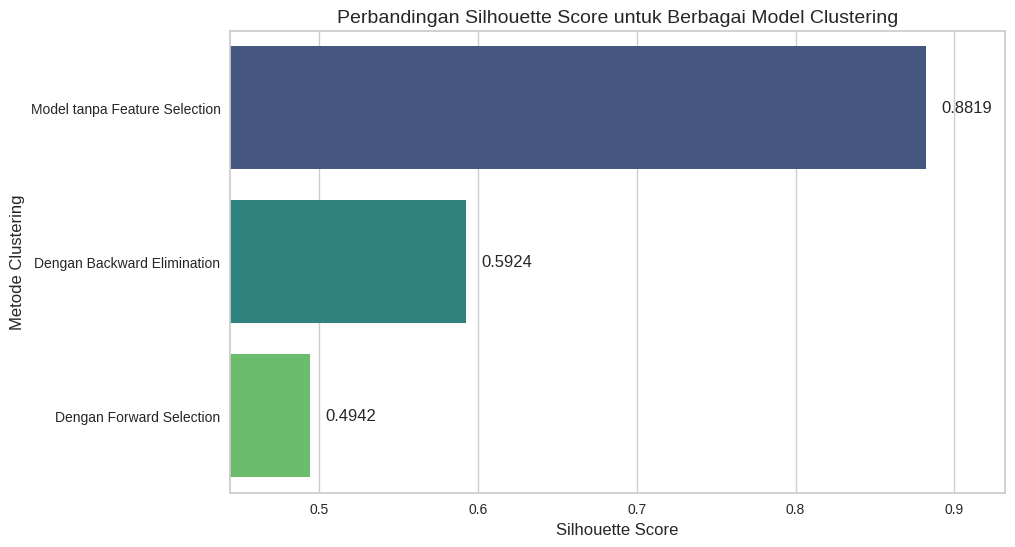

Hasil Perbandingan Silhouette Score
 Model tanpa Feature Selection
   ➤ Silhouette Score: 0.8819
   ➤ Fitur Terpilih: ['Price', 'Room_scaled', 'Parking_True', 'Warehouse_True', 'Elevator_True']

 Dengan Backward Elimination
   ➤ Silhouette Score: 0.5924
   ➤ Fitur Terpilih: ['Price', 'Room_scaled', 'Parking_True', 'Warehouse_True', 'Elevator_True']

 Dengan Forward Selection
   ➤ Silhouette Score: 0.4942
   ➤ Fitur Terpilih: ['Area', 'Price', 'Price(USD)', 'Room_scaled', 'Parking_True']



In [ ]:
silhouette_scores = {}

# Model tanpa feature selection
silhouette_scores['Model tanpa Feature Selection'] = {
    'score': silhouette_avg,
    'features': ['Price', 'Room_scaled', 'Parking_True', 'Warehouse_True', 'Elevator_True']
}

# Backward Elimination
silhouette_scores['Dengan Backward Elimination'] = {
    'score': best_score_be,
    'features': best_features_be
}

# Forward Selection
silhouette_scores['Dengan Forward Selection'] = {
    'score': best_score_fs,
    'features': best_features_fs
}

model_names = list(silhouette_scores.keys())
silhouette_values = [result['score'] for result in silhouette_scores.values()]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=silhouette_values, y=model_names, hue=model_names, dodge=False, palette="viridis")

for index, value in enumerate(silhouette_values):
    plt.text(value + 0.01, index, f"{value:.4f}", va='center', fontsize=12)

plt.title("Perbandingan Silhouette Score untuk Berbagai Model Clustering", fontsize=14)
plt.xlabel("Silhouette Score", fontsize=12)
plt.ylabel("Metode Clustering", fontsize=12)
plt.xlim(min(silhouette_values) - 0.05, max(silhouette_values) + 0.05)

plt.show()

print("Hasil Perbandingan Silhouette Score")
for model, result in silhouette_scores.items():
    print(f" {model}")
    print(f"   ➤ Silhouette Score: {result['score']:.4f}")
    print(f"   ➤ Fitur Terpilih: {result['features']}\n")


4. Visualisasi Hasil dari Clustering
------------------------------------------

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

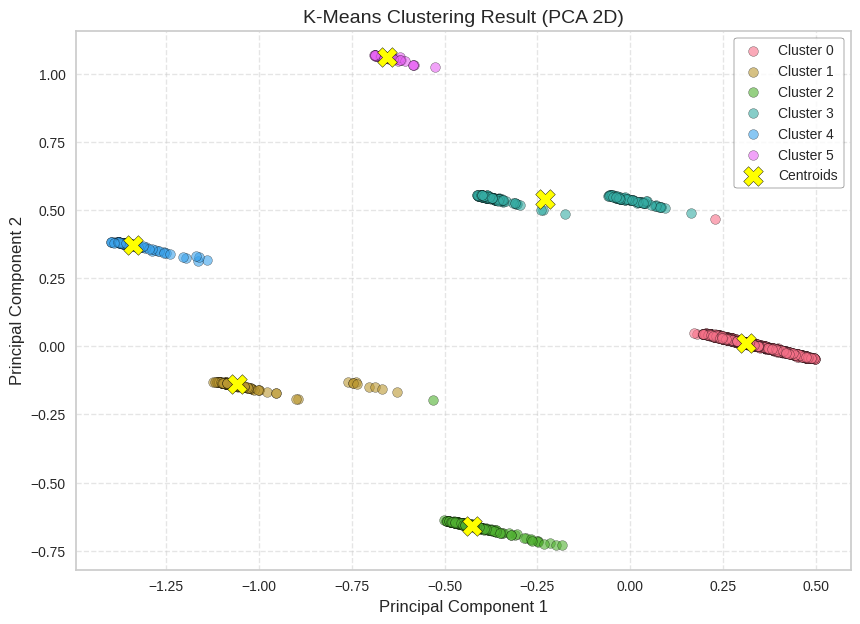

In [ ]:
plt.figure(figsize=(10, 7))

num_clusters = len(set(kmeans.labels_))

colors = sns.color_palette("husl", num_clusters)

for i in range(num_clusters):
    plt.scatter(X_pca[kmeans.labels_ == i, 0],
                X_pca[kmeans.labels_ == i, 1],
                label=f'Cluster {i}',
                color=colors[i], alpha=0.6, edgecolors='black')

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='yellow', marker='X', s=200, label='Centroids', edgecolors='black')

plt.title('K-Means Clustering Result (PCA 2D)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(loc='best', frameon=True, edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

5. Analisis dan Interpretasi Hasil Cluster
-------------------------------------------

* INTERPRESTASI TARGET

In [ ]:
df_labeled = df_full_final.copy()
df_labeled['Cluster'] = kmeans.labels_

df_labeled.head()

,Area,Address,Price,Price(USD),Room_scaled,Parking_True,Warehouse_True,Elevator_True,Cluster
0,-0.631533,Shahran,-0.433929,-0.433929,0.2,1.0,1.0,1.0,0
1,-0.674673,Shahran,-0.433929,-0.433929,0.2,1.0,1.0,1.0,0
2,-0.401453,Pardis,-0.593934,-0.593934,0.4,1.0,1.0,1.0,0
3,-0.171372,Shahrake Qods,-0.550548,-0.550548,0.4,1.0,1.0,1.0,0
4,0.231268,Shahrake Gharb,0.199937,0.199937,0.4,1.0,1.0,1.0,0


In [ ]:
print("\nDistribusi Data dalam Setiap Cluster:")
print(df_labeled['Cluster'].value_counts())


Distribusi Data dalam Setiap Cluster:
Cluster
0    1936
2     331
1     210
3     208
4     112
5      66
Name: count, dtype: int64


Melakukan Data Normalisasi atau Standardisasi
==========================================

In [ ]:
encoded_cols = df_labeled[['Parking_True', 'Warehouse_True', 'Elevator_True']]

# Lakukan inverse transform dari one-hot encoded data
decoded_features = encoder.inverse_transform(encoded_cols)

df_decoded = pd.DataFrame(decoded_features, columns=['Parking', 'Warehouse', 'Elevator'])

df_labeled[['Parking', 'Warehouse', 'Elevator']] = df_decoded
df_labeled.drop(columns=['Parking_True', 'Warehouse_True', 'Elevator_True'], inplace=True)

df_labeled.head()

,Area,Address,Price,Price(USD),Room_scaled,Cluster,Parking,Warehouse,Elevator
0,-0.631533,Shahran,-0.433929,-0.433929,0.2,0,True,True,True
1,-0.674673,Shahran,-0.433929,-0.433929,0.2,0,True,True,True
2,-0.401453,Pardis,-0.593934,-0.593934,0.4,0,True,True,True
3,-0.171372,Shahrake Qods,-0.550548,-0.550548,0.4,0,True,True,True
4,0.231268,Shahrake Gharb,0.199937,0.199937,0.4,0,True,True,True


In [ ]:
df_labeled['Room'] = min_max_scaler.inverse_transform(df_labeled[['Room_scaled']]).round().astype(int)
df_labeled.drop(columns=['Room_scaled'], inplace=True)

In [ ]:
# Kembalikan nilai Area, Price, dan Price(USD)
df_labeled[['Area', 'Price', 'Price(USD)']] = scaler.inverse_transform(df_labeled[['Area', 'Price', 'Price(USD)']])

df_labeled.head()

,Area,Address,Price,Price(USD),Cluster,Parking,Warehouse,Elevator,Room
0,63.0,Shahran,1.850000e+09,61666.67,0,True,True,True,1
1,60.0,Shahran,1.850000e+09,61666.67,0,True,True,True,1
2,79.0,Pardis,5.500000e+08,18333.33,0,True,True,True,2
3,95.0,Shahrake Qods,9.025000e+08,30083.33,0,True,True,True,2
4,123.0,Shahrake Gharb,7.000000e+09,233333.33,0,True,True,True,2


Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Cluster
0    1936
2     331
1     210
3     208
4     112
5      66
Name: count, dtype: int64 



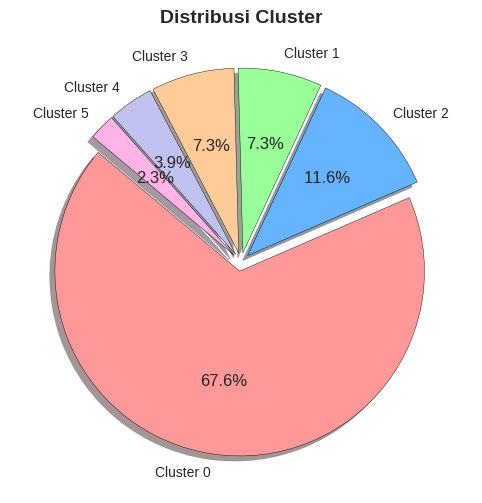

In [ ]:
cluster_count = df_labeled['Cluster'].value_counts()
print(cluster_count, '\n')

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

plt.figure(figsize=(8, 6))
explode = [0.05] * len(cluster_count)
plt.pie(cluster_count, labels=[f'Cluster {i}' for i in cluster_count.index],
        autopct='%1.1f%%', startangle=140, colors=colors,
        explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Distribusi Cluster', fontsize=14, fontweight='bold')
plt.show()

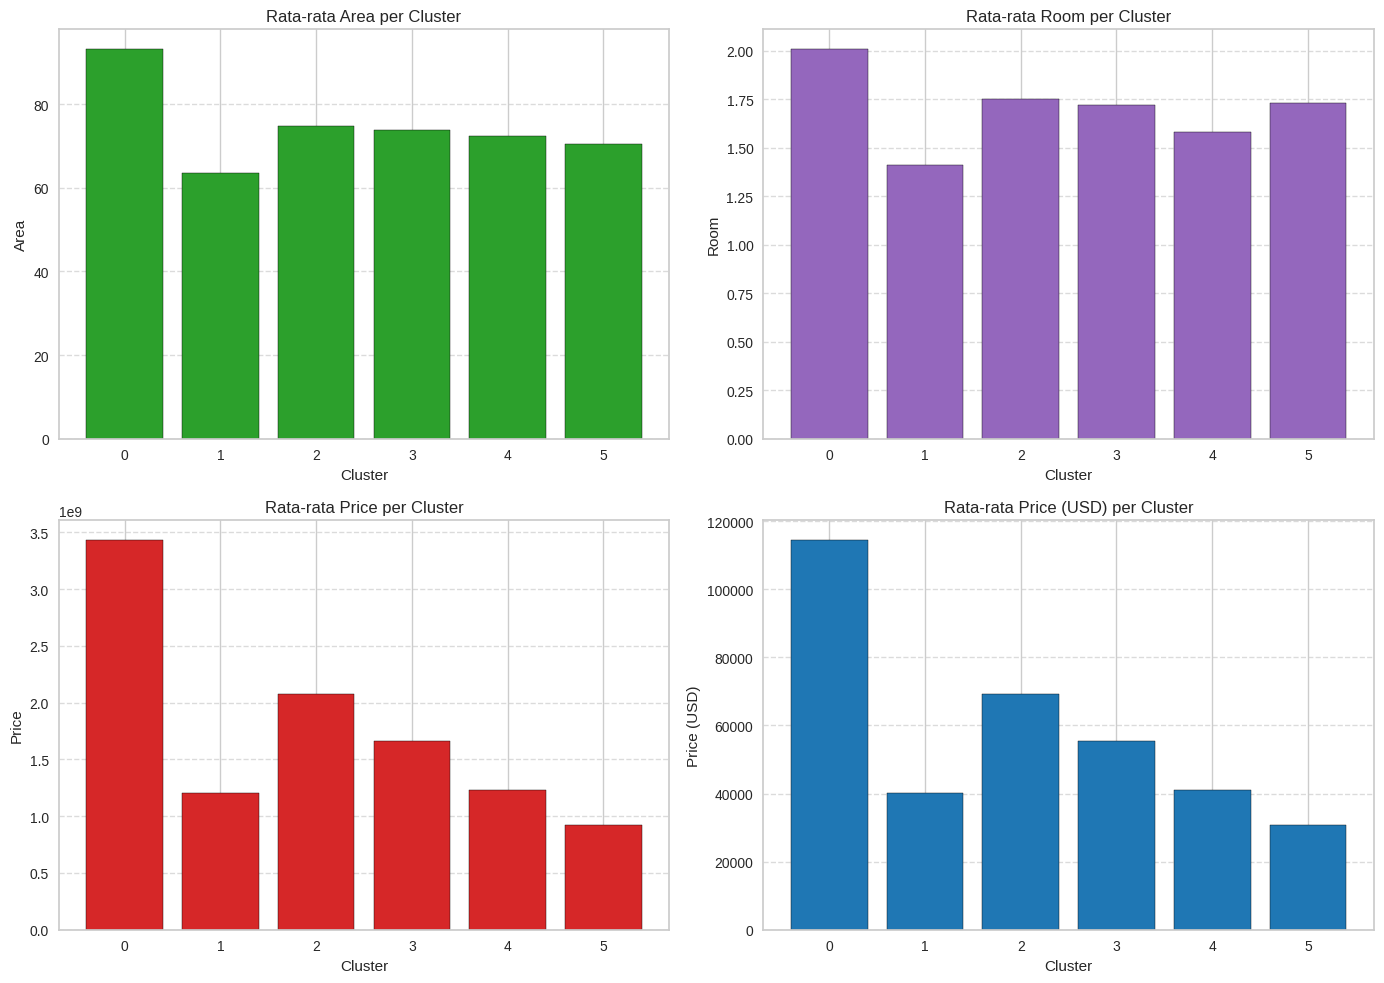

          Area          Price Price(USD)  Room
Cluster                                       
0        93.21  3,434,904,494    114,497  2.01
1        63.58  1,200,367,143     40,012  1.41
2        74.70  2,079,925,076     69,331  1.75
3        73.69  1,664,987,981     55,500  1.72
4        72.30  1,234,875,893     41,163  1.58
5        70.39    920,833,333     30,694  1.73


In [ ]:
cluster_means = df_labeled.select_dtypes(include=['number']).groupby('Cluster').mean()

cluster_means[['Area', 'Room']] = cluster_means[['Area', 'Room']].round(2)

cluster_means['Price'] = cluster_means['Price'].map(lambda x: f'{x:,.0f}')
cluster_means['Price(USD)'] = cluster_means['Price(USD)'].map(lambda x: f'{x:,.0f}')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors = ['#2ca02c', '#9467bd', '#d62728', '#1f77b4']

# 1. Area vs Cluster
axes[0, 0].bar(cluster_means.index, cluster_means['Area'], color=colors[0], edgecolor='black')
axes[0, 0].set_title("Rata-rata Area per Cluster")
axes[0, 0].set_xlabel("Cluster")
axes[0, 0].set_ylabel("Area")
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Room vs Cluster
axes[0, 1].bar(cluster_means.index, cluster_means['Room'], color=colors[1], edgecolor='black')
axes[0, 1].set_title("Rata-rata Room per Cluster")
axes[0, 1].set_xlabel("Cluster")
axes[0, 1].set_ylabel("Room")
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# 3. Price vs Cluster (ubah ke tipe numerik sebelum plotting)
axes[1, 0].bar(cluster_means.index, pd.to_numeric(cluster_means['Price'].str.replace(',', '')), color=colors[2], edgecolor='black')
axes[1, 0].set_title("Rata-rata Price per Cluster")
axes[1, 0].set_xlabel("Cluster")
axes[1, 0].set_ylabel("Price")
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 4. Price(USD) vs Cluster (ubah ke tipe numerik sebelum plotting)
axes[1, 1].bar(cluster_means.index, pd.to_numeric(cluster_means['Price(USD)'].str.replace(',', '')), color=colors[3], edgecolor='black')
axes[1, 1].set_title("Rata-rata Price (USD) per Cluster")
axes[1, 1].set_xlabel("Cluster")
axes[1, 1].set_ylabel("Price (USD)")
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(cluster_means)

In [ ]:
parking_counts = df_labeled.groupby("Cluster")["Parking"].value_counts().unstack(fill_value=0)

parking_counts = parking_counts.reindex(columns=[False, True], fill_value=0)

# Hitung modus dari kolom 'Parking' untuk setiap Cluster
parking_mode = df_labeled.groupby("Cluster")["Parking"].agg(lambda x: x.mode().iloc[0])

print(parking_counts)
print("\nModus Parking untuk setiap Cluster:")
print(parking_mode)

Parking  False  True 
Cluster              
0            0   1936
1          201      9
2            0    331
3          128     80
4          112      0
5           66      0

Modus Parking untuk setiap Cluster:
Cluster
0     True
1    False
2     True
3    False
4    False
5    False
Name: Parking, dtype: bool


In [ ]:
warehouse_counts = df_labeled.groupby("Cluster")["Warehouse"].value_counts().unstack(fill_value=0)

warehouse_counts = warehouse_counts.reindex(columns=[False, True], fill_value=0)

# Hitung modus dari kolom 'Warehouse' untuk setiap Cluster
warehouse_mode = df_labeled.groupby("Cluster")["Warehouse"].agg(lambda x: x.mode().iloc[0])

print(warehouse_counts)
print("\nModus Warehouse untuk setiap Cluster:")
print(warehouse_mode)

Warehouse  False  True 
Cluster                
0              1   1935
1              9    201
2              1    330
3             80    128
4            112      0
5             66      0

Modus Warehouse untuk setiap Cluster:
Cluster
0     True
1     True
2     True
3     True
4    False
5    False
Name: Warehouse, dtype: bool


In [ ]:
elevator_counts = df_labeled.groupby("Cluster")["Elevator"].value_counts().unstack(fill_value=0)

elevator_counts = elevator_counts.reindex(columns=[False, True], fill_value=0)

# Hitung modus dari kolom 'Elevator' untuk setiap Cluster
elevator_mode = df_labeled.groupby("Cluster")["Elevator"].agg(lambda x: x.mode().iloc[0])

print(elevator_counts)
print("\nModus Elevator untuk setiap Cluster:")
print(elevator_mode)


Elevator  False  True 
Cluster               
0             0   1936
1           210      0
2           331      0
3             0    208
4           112      0
5             0     66

Modus Elevator untuk setiap Cluster:
Cluster
0     True
1    False
2    False
3     True
4    False
5     True
Name: Elevator, dtype: bool


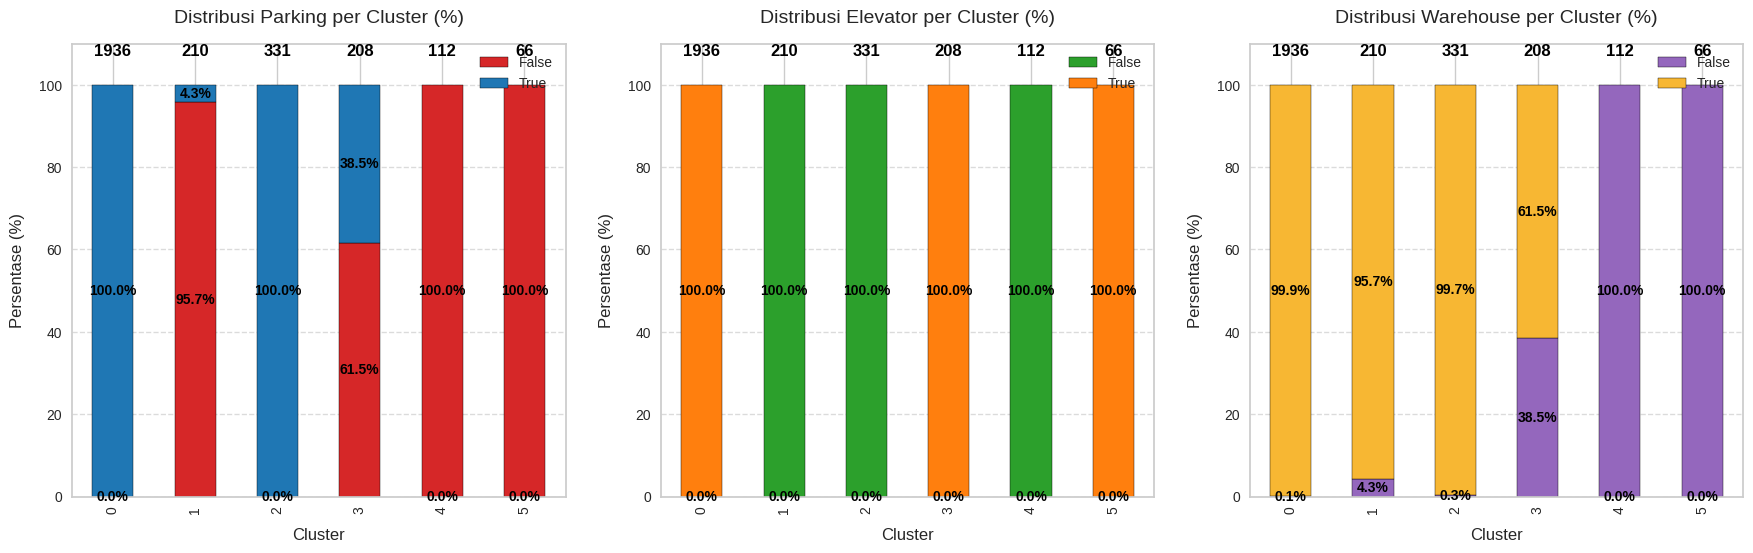

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

def plot_bar(ax, feature, color1, color2):
    counts = df_labeled.groupby("Cluster")[feature].value_counts().unstack(fill_value=0)
    counts = counts.reindex(columns=[False, True], fill_value=0)

    counts_pct = counts.div(counts.sum(axis=1), axis=0) * 100

    counts_pct.plot(kind="bar", stacked=True, ax=ax, color=[color1, color2], edgecolor="black")

    ax.set_title(f"Distribusi {feature} per Cluster (%)", fontsize=14, pad=15)
    ax.set_xlabel("Cluster", fontsize=12, labelpad=10)
    ax.set_ylabel("Persentase (%)", fontsize=12, labelpad=10)
    ax.legend(["False", "True"], fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    ax.set_ylim(0, 110)

    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="black", weight="bold")

    for i, cluster in enumerate(counts.index):
      total = counts.loc[cluster].sum()
      ax.text(i, 107, f"{total}", ha="center", fontsize=12, fontweight="bold", color="black")

# Plot untuk Parking
plot_bar(axes[0], "Parking", "#d62728", "#1f77b4")

# Plot untuk Elevator
plot_bar(axes[1], "Elevator", "#2ca02c", "#ff7f0e")

# Plot untuk Warehouse
plot_bar(axes[2], "Warehouse", "#9467bd", "#f7b733")

plt.tight_layout(pad=2.0)
plt.show()

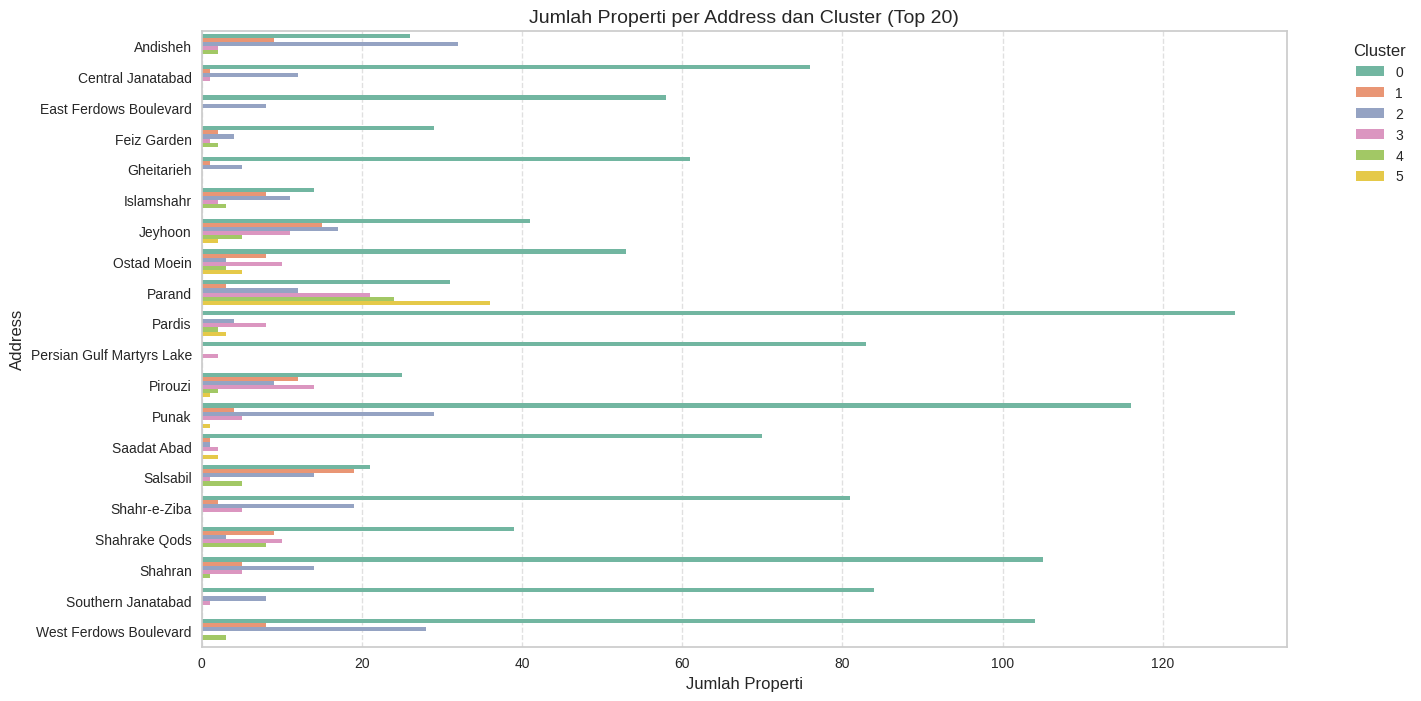

In [ ]:
address_cluster_counts = df_labeled.groupby(['Address', 'Cluster']).size().reset_index(name='Count')

top_addresses = address_cluster_counts.groupby("Address")["Count"].sum().nlargest(20).index
filtered_data = address_cluster_counts[address_cluster_counts["Address"].isin(top_addresses)]

plt.figure(figsize=(14, 8))

sns.barplot(
    data=filtered_data,
    x='Count',
    y='Address',
    hue='Cluster',
    palette='Set2'
)

plt.title("Jumlah Properti per Address dan Cluster (Top 20)", fontsize=14)
plt.xlabel("Jumlah Properti", fontsize=12)
plt.ylabel("Address", fontsize=12)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

# Cluster 0
- **Rata-rata Area:** 93.21

- **Rata-rata Price:** 3,434,904,494

- **Rata-rata Price (USD):** 114,497

- **Rata-rata Room:** 2.01

- **Modus Parking:** Ya (Mayoritas properti memiliki Parking)

- **Modus Elevator:** Ya (Mayoritas properti memiliki Elevator)

- **Modus Warehouse:** Ya (Mayoritas properti memiliki Warehouse)

- **Modus Alamat Teratas:** Parand, Pirouzi, Punak

- **Analisis:**

  - Cluster dengan harga properti tertinggi dan luas area terbesar.

  - Memiliki fasilitas lengkap (Parking, Elevator, Warehouse), menjadikannya pilihan premium.

  - Cocok untuk pembeli yang mencari properti dengan semua fasilitas utama.

## Cluster 1
- **Rata-rata Area:** 63.58
- **Rata-rata Price:** 1,200,367,143

- **Rata-rata Price (USD):** 40,012

- **Rata-rata Room:** 1.41

- **Parking:** Tidak (Mayoritas properti tidak memiliki Parking)

- **Elevator:** Tidak (Mayoritas properti tidak memiliki Elevator)

- **Warehouse:** Ya (Mayoritas properti memiliki Warehouse)

- **Modus Alamat Teratas:** Jeyhoon, Ostad Moein, Pirouzi

- **Analisis:**

  - Properti ekonomis dengan fasilitas terbatas.

  - Mayoritas properti tidak memiliki Parking dan Elevator, menunjukkan properti lebih banyak berupa rumah sederhana.

  - Sebagian besar properti memiliki Warehouse, cocok untuk bisnis kecil atau penyimpanan tambahan.

  - Cocok untuk pembeli dengan anggaran terbatas yang tetap membutuhkan ruang penyimpanan.

## Cluster 2
- **Rata-rata Area:** 74.70
- **Rata-rata Price:** 2,079,925,076

- **Rata-rata Price (USD):** 69,331

- **Rata-rata Room:** 1.75

- **Parking:** Ya (Mayoritas properti memiliki Parking)

- **Elevator:** Tidak (Mayoritas properti tidak memiliki Elevator)

- **Warehouse:** Ya (Mayoritas properti memiliki Warehouse)

- **Modus Alamat Teratas:** Andisheh, Islamshahr, Parand

- **Analisis:**

  - Kombinasi luas area sedang dengan harga menengah.

  - Memiliki Parking dan Warehouse, tetapi tidak memiliki Elevator.

  - Kemungkinan besar berupa rumah atau properti bisnis dengan akses kendaraan dan ruang penyimpanan.

  - Cocok untuk keluarga atau bisnis kecil yang membutuhkan parkir dan gudang.

## Cluster 3
- **Rata-rata Area:** 73.69

- **Rata-rata Price:** 1,664,987,981
- **Rata-rata Price (USD):** 55,500

- **Rata-rata Room:** 1.72

- **Parking:** Tidak (Mayoritas properti tidak memiliki Parking)

- **Elevator:** Ya (Mayoritas properti memiliki Elevator)

- **Warehouse:** Ya (Mayoritas properti memiliki Warehouse)

- **Modus Alamat Teratas:** Persian Gulf Martyrs Lake, Pirouzi, Punak

- **Analisis:**- Cluster dengan fasilitas modern, termasuk Elevator dan Warehouse, tetapi tidak memiliki Parking.

  - Kemungkinan besar berupa apartemen atau kompleks bisnis bertingkat.

  - Cocok bagi pembeli yang mencari apartemen atau properti dengan aksesibilitas tinggi.

## Cluster 4
- **Rata-rata Area:** 72.30

- **Rata-rata Price:** 1,234,875,893

- **Rata-rata Price (USD):** 41,163

- **Rata-rata Room:** 1.58

- **Parking:** Tidak (Mayoritas properti tidak memiliki Parking)

- **Elevator:** Tidak (Mayoritas properti tidak memiliki Elevator)

- **Warehouse:** Tidak (Mayoritas properti tidak memiliki Warehouse)

- **Modus Alamat Teratas:** Parand, Pirouzi,Punak
- **Analisis:**

  - Cluster dengan harga properti lebih rendah dan tanpa fasilitas tambahan.

  - Kemungkinan besar merupakan perumahan murah tanpa gudang atau lift.

  - Cocok untuk pembeli pertama atau mereka yang mencari hunian minimalis dengan anggaran terbatas.

## Cluster 5
- **Rata-rata Area:** 70.39

- **Rata-rata Price:** 920,833,333

- **Rata-rata Price (USD):** 30,694

- **Rata-rata Room:** 1.73

- **Parking:** Tidak (Mayoritas properti tidak memiliki Parking)

- **Elevator:** Ya (Mayoritas properti memiliki Elevator)

- **Warehouse:** Tidak (Mayoritas properti tidak memiliki Warehouse)

- **Modus Alamat Teratas:** Parand, Pardis, Feiz Garden

- **Analisis:**

  - Harga properti paling murah dengan fasilitas Elevator, tetapi tanpa Parking dan Warehouse.
  - Kemungkinan besar merupakan apartemen murah tanpa fasilitas penyimpanan.

  - Cocok untuk pembeli yang mencari apartemen dengan akses lift tetapi tidak membutuhkan parkir atau gudang.

**Menyimpan Data (Expor Data)**

In [ ]:
# Simpan Hasil ke file csv
file_path = "cluster_summary.csv"
df_labeled.to_csv(file_path, index=False)